In [4]:
import mlrose_hiive as mlrose
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import time
import random as rn
import os
import time
import sys
%matplotlib inline

In [5]:
"""
Setting up seed values for reproducability
"""
starting_seed = 1234
seed_values = []

for i in range(0, 5):
    seed_values.append(starting_seed + i)

# np.random.seed(seed)
# rn.seed(seed)
# os.environ['PYTHONHASHSEED'] = str(seed)

# First run

Trying the different algorithms on the optimization problem with differing problem sizes before messing with the hyperparameters and the different iterations amounts.

In [17]:
"""
Main custom runner for the KnapSack optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
max_weight_pct = 0.6

# Hyperparamters RHC
max_attempts_rhc = 100
max_iters_rhc = np.inf
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100
max_iters_sa = np.inf

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100
max_iters_ga = np.inf

# Hyperparameters MIMIC
pop_size_mimic = 400
keep_pct = 0.8
max_attempts_mimic = 100
max_iters_mimic = np.inf

problem_sizes = [1 * i for i in range(0, 160, 10)]
problem_sizes.pop(0)

rhc_data_problem_sizes = []
sa_data_problem_sizes = []
ga_data_problem_sizes = []
mimic_data_problem_sizes = []

# Want to loop across the different problem sizes
for problem_size in problem_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running problem size {problem_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_weights = np.random.randint(1, problem_size, size=problem_size)
        initial_values = np.random.randint(1, problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.Knapsack(initial_weights, initial_values, max_weight_pct)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=max_iters_rhc,
            restarts=restarts,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=max_iters_sa,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=max_iters_ga,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_fitness)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=max_iters_mimic,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        mimic_data_avg.append(best_fitness)
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_problem_sizes.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_problem_sizes.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_problem_sizes.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_problem_sizes.append(mimic_avg)
    
    print("====================================================")


Running problem size 10!
RHC best avg fitness 41.6
SA best avg fitness 36.6
GA best avg fitness 42.0
MIMIC best avg fitness 42.0
Running problem size 20!
RHC best avg fitness 155.8
SA best avg fitness 145.8
GA best avg fitness 173.0
MIMIC best avg fitness 170.4
Running problem size 30!
RHC best avg fitness 340.0
SA best avg fitness 264.0
GA best avg fitness 380.6
MIMIC best avg fitness 374.0
Running problem size 40!
RHC best avg fitness 585.8
SA best avg fitness 528.2
GA best avg fitness 688.0
MIMIC best avg fitness 677.4
Running problem size 50!
RHC best avg fitness 912.2
SA best avg fitness 885.2
GA best avg fitness 1094.4
MIMIC best avg fitness 1069.4
Running problem size 60!
RHC best avg fitness 1353.8
SA best avg fitness 1238.8
GA best avg fitness 1636.6
MIMIC best avg fitness 1618.4
Running problem size 70!
RHC best avg fitness 1815.2
SA best avg fitness 1620.8
GA best avg fitness 2189.0
MIMIC best avg fitness 2175.2
Running problem size 80!
RHC best avg fitness 2216.8
SA best av

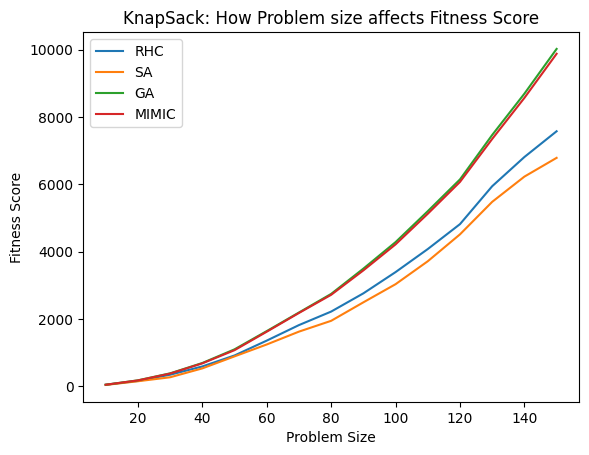

In [18]:
"""
Plotting the fitness score (Y axis) to problem size (X axis) for KnapSack
"""

plt.plot(problem_sizes, rhc_data_problem_sizes, label = 'RHC')
plt.plot(problem_sizes, sa_data_problem_sizes, label = 'SA')
plt.plot(problem_sizes, ga_data_problem_sizes, label = 'GA')
plt.plot(problem_sizes, mimic_data_problem_sizes, label = 'MIMIC')

plt.xlabel("Problem Size")
plt.ylabel("Fitness Score")
plt.title("KnapSack: How Problem size affects Fitness Score")
plt.legend()
plt.show()

# Now trying with different iteration sizes with a fixed problem size

It seems that the difference between the curves happen when the problem size reaches around 60 bits. For this iteration we will set the problem size to 60 and try out different iteration sizes to see how it changes the fitness score.

In [20]:
"""
Main custom runner for the KnapSack optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
max_weight_pct = 0.6
problem_size = 120

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 400
keep_pct = 0.8
max_attempts_mimic = 100

iteration_sizes = [1 * i for i in range(0, 150, 3)]
iteration_sizes.pop(0)

rhc_data_iteration_sizes = []
sa_data_iteration_sizes = []
ga_data_iteration_sizes = []
mimic_data_iteration_sizes = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_weights = np.random.randint(1, problem_size, size=problem_size)
        initial_values = np.random.randint(1, problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.Knapsack(initial_weights, initial_values, max_weight_pct)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_fitness)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        mimic_data_avg.append(best_fitness)
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_iteration_sizes.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_iteration_sizes.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_iteration_sizes.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_iteration_sizes.append(mimic_avg)
    
    print("====================================================")


Running iteration size 3!
RHC best avg fitness 4353.2
SA best avg fitness 3646.4
GA best avg fitness 4530.8
MIMIC best avg fitness 4708.2
Running iteration size 6!
RHC best avg fitness 4326.2
SA best avg fitness 3723.2
GA best avg fitness 4937.2
MIMIC best avg fitness 4843.6
Running iteration size 9!
RHC best avg fitness 4373.2
SA best avg fitness 3770.8
GA best avg fitness 4994.2
MIMIC best avg fitness 4907.2
Running iteration size 12!
RHC best avg fitness 4400.4
SA best avg fitness 3837.6
GA best avg fitness 5156.6
MIMIC best avg fitness 5050.4
Running iteration size 15!
RHC best avg fitness 4568.2
SA best avg fitness 3941.2
GA best avg fitness 5321.4
MIMIC best avg fitness 5106.6
Running iteration size 18!
RHC best avg fitness 4556.6
SA best avg fitness 3988.2
GA best avg fitness 5412.8
MIMIC best avg fitness 5226.8
Running iteration size 21!
RHC best avg fitness 4601.6
SA best avg fitness 4066.8
GA best avg fitness 5502.6
MIMIC best avg fitness 5274.8
Running iteration size 24!
RHC

RHC best avg fitness 4748.4
SA best avg fitness 4450.0
GA best avg fitness 6143.8
MIMIC best avg fitness 6071.0
Running iteration size 135!
RHC best avg fitness 4773.0
SA best avg fitness 4450.0
GA best avg fitness 6143.8
MIMIC best avg fitness 6071.0
Running iteration size 138!
RHC best avg fitness 4757.8
SA best avg fitness 4471.6
GA best avg fitness 6143.8
MIMIC best avg fitness 6071.0
Running iteration size 141!
RHC best avg fitness 4786.4
SA best avg fitness 4471.6
GA best avg fitness 6143.8
MIMIC best avg fitness 6071.0
Running iteration size 144!
RHC best avg fitness 4767.2
SA best avg fitness 4496.6
GA best avg fitness 6146.0
MIMIC best avg fitness 6071.0
Running iteration size 147!
RHC best avg fitness 4817.2
SA best avg fitness 4496.6
GA best avg fitness 6146.0
MIMIC best avg fitness 6071.0


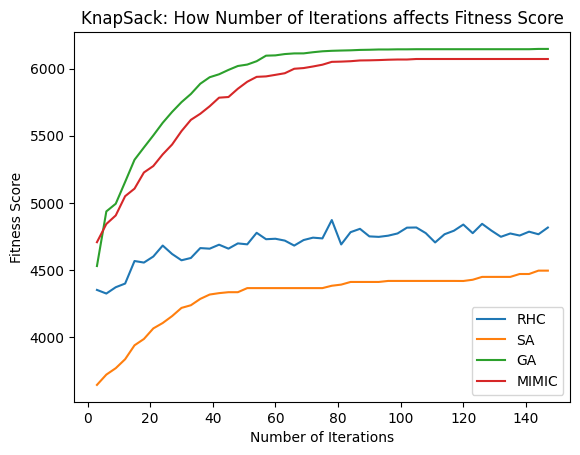

In [21]:
"""
Plotting the fitness score (Y axis) to iteration size (X axis) for KnapSack
"""

plt.plot(iteration_sizes, rhc_data_iteration_sizes, label = 'RHC')
plt.plot(iteration_sizes, sa_data_iteration_sizes, label = 'SA')
plt.plot(iteration_sizes, ga_data_iteration_sizes, label = 'GA')
plt.plot(iteration_sizes, mimic_data_iteration_sizes, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Score")
plt.title("KnapSack: How Number of Iterations affects Fitness Score")
plt.legend()
plt.show()

# Generating the Number of FEvals with respect to Iterations

In [ ]:
"""
Main custom runner for the KnapSack optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
max_weight_pct = 0.6
problem_size = 120

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 400
keep_pct = 0.8
max_attempts_mimic = 100
noise = 0.1

iteration_sizes = [1 * i for i in range(0, 1000, 50)]
iteration_sizes.pop(0)

rhc_data_fevals = []
sa_data_fevals = []
ga_data_fevals = []
mimic_data_fevals = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_weights = np.random.randint(1, problem_size, size=problem_size)
        initial_values = np.random.randint(1, problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.Knapsack(initial_weights, initial_values, max_weight_pct)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(best_curve[-1][1])
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_fevals.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_fevals.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_fevals.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_fevals.append(mimic_avg)
    
    print("====================================================")


In [ ]:
"""
Plotting the FEvals (Y axis) to iteration size (X axis) for KnapSack
"""

plt.plot(iteration_sizes, rhc_data_fevals, label = 'RHC')
plt.plot(iteration_sizes, sa_data_fevals, label = 'SA')
plt.plot(iteration_sizes, ga_data_fevals, label = 'GA')
plt.plot(iteration_sizes, mimic_data_fevals, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("FEval Calls")
plt.title("KnapSack: How Number of Iterations affects Number of FEval Calls")
plt.legend()
plt.show()

# Comparing the Wall Clock Times based off Iteration Number

In [ ]:
"""
Main custom runner for the KnapSack optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
max_weight_pct = 0.6
problem_size = 120

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 400
keep_pct = 0.8
max_attempts_mimic = 100
noise = 0.1

iteration_sizes = [1 * i for i in range(0, 1000, 50)]
iteration_sizes.pop(0)

rhc_data_clock = []
sa_data_clock = []
ga_data_clock = []
mimic_data_clock = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_weights = np.random.randint(1, problem_size, size=problem_size)
        initial_values = np.random.randint(1, problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.Knapsack(initial_weights, initial_values, max_weight_pct)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(end - start)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(end - start)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(end - start)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(end - start)
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_clock.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_clock.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_clock.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_clock.append(mimic_avg)
    
    print("====================================================")


In [ ]:
"""
Plotting the Clock Time (Y axis) to iteration size (X axis) for KnapSack
"""

plt.plot(iteration_sizes, rhc_data_clock, label = 'RHC')
plt.plot(iteration_sizes, sa_data_clock, label = 'SA')
plt.plot(iteration_sizes, ga_data_clock, label = 'GA')
plt.plot(iteration_sizes, mimic_data_clock, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("Wall Clock Times (s)")
plt.title("KnapSack: How Number of Iterations affects Clock Time")
plt.legend()
plt.show()